✅ Archivo encontrado. Cargando datos... (esto puede tardar un poco)
Datos cargados exitosamente. Dimensiones: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0



--- Distribución de la variable objetivo (TARGET) ---
Clientes que PAGARON (0): 91.93%
Clientes con INCUMPLIMIENTO (1): 8.07%


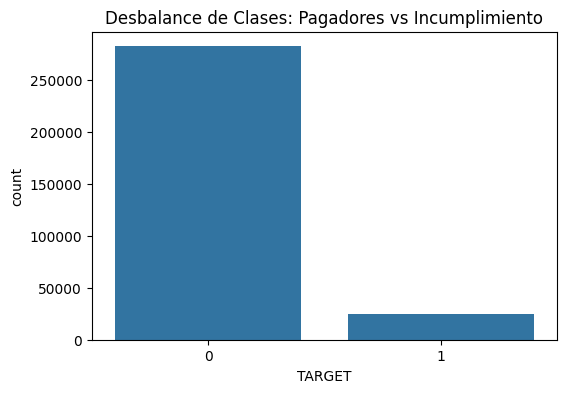


--- Top 10 columnas con valores faltantes ---


,Total,Porcentaje (%)
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953



Columnas sin ningún valor nulo: 55 de 122


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Configuración de rutas
# Como el notebook está en una subcarpeta, debemos "subir" un nivel (..) para ir a data
PATH_DATA = "../data/raw/application_train.csv"

# 2. Verificar si el archivo existe antes de cargar
if os.path.exists(PATH_DATA):
    print("Archivo encontrado. Cargando datos... (esto puede tardar un poco)")
    df = pd.read_csv(PATH_DATA)
    print(f"Datos cargados exitosamente. Dimensiones: {df.shape}")
else:
    print("ERROR: No encuentro el archivo. Verifica que moviste los CSV a 'data/raw'")

# 3. Vista previa de las primeras filas
display(df.head())

# 4. Revisar el "Desbalance de Clases" (Punto clave del examen)
# El examen dice que hay una "clase minoritaria (incumplimiento)"
conteo = df['TARGET'].value_counts(normalize=True) * 100
print("\n--- Distribución de la variable objetivo (TARGET) ---")
print(f"Clientes que PAGARON (0): {conteo[0]:.2f}%")
print(f"Clientes con INCUMPLIMIENTO (1): {conteo[1]:.2f}%")

# 5. Gráfico rápido
plt.figure(figsize=(6,4))
sns.countplot(x='TARGET', data=df)
plt.title("Desbalance de Clases: Pagadores vs Incumplimiento")
plt.show()

# Revisar valores nulos (missing values)
total_nulos = df.isnull().sum().sort_values(ascending=False)
porcentaje_nulos = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)

# Crear una tabla con los resultados
missing_data = pd.concat([total_nulos, porcentaje_nulos], axis=1, keys=['Total', 'Porcentaje (%)'])

# Mostrar las 10 columnas con más datos faltantes
print("\n--- Top 10 columnas con valores faltantes ---")
display(missing_data.head(10))

# Ver cuántas columnas no tienen ningún dato faltante
print(f"\nColumnas sin ningún valor nulo: {len(missing_data[missing_data['Porcentaje (%)'] == 0])} de 122")